In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [35]:

from os import scandir

def cropfile(pathin,pathout, x, y, w, h,ws):
    img = cv2.imread(pathin)
    if ws:
        cv2.imwrite(pathout, img)
    else:
        test_images.append(img)

#Función para encontrar todas las imagenes que están en un directorio    
def ls1(path):    
    return [obj.name for obj in scandir(path) if obj.is_file()]

#Función para separar el nombre del archivo
def splitfilename(filename):
    sname=""
    sext=""
    i=filename.rfind(".")
    if(i!=0):
        n=len(filename)
        j=n-i-1
        sname=filename[0:i]
        sext=filename[-j:]    
    return sext, sname

#Arreglo de imagenes de prueba
test_images = []

for i in range(1,14):
    path = "Imagenes/Completo/Switch"+str(i)+"/"
    #Files es un arreglo con todos los nombres de las imagenes que están dentro del path
    files=ls1(path)
    j = 0
    for file in files:
        # Es el path + el nombre de la imagen
        filea=path + file # archivo original
        #sext es la extensión y sfilename y es el nombre del archivo sin la extensión
        sext, sfilename = splitfilename(file)    
        #creación del path de archivo ya con el crop
        filec=path+"rename/" + "S"+str(i)+"-"+str(j) + ".png" # archivo crop    
        j +=1
        print(filec)
        cropfile(filea, filec, 250, 90, 300,200,1)
    cropfile(path+files[0],filec,250,90,300,200,0)

    
        



Imagenes/Completo/Switch1/rename/S1-0.png
Imagenes/Completo/Switch1/rename/S1-1.png
Imagenes/Completo/Switch1/rename/S1-2.png
Imagenes/Completo/Switch1/rename/S1-3.png
Imagenes/Completo/Switch1/rename/S1-4.png
Imagenes/Completo/Switch1/rename/S1-5.png
Imagenes/Completo/Switch1/rename/S1-6.png
Imagenes/Completo/Switch1/rename/S1-7.png
Imagenes/Completo/Switch1/rename/S1-8.png
Imagenes/Completo/Switch1/rename/S1-9.png
Imagenes/Completo/Switch1/rename/S1-10.png
Imagenes/Completo/Switch1/rename/S1-11.png
Imagenes/Completo/Switch1/rename/S1-12.png
Imagenes/Completo/Switch1/rename/S1-13.png
Imagenes/Completo/Switch1/rename/S1-14.png
Imagenes/Completo/Switch1/rename/S1-15.png
Imagenes/Completo/Switch1/rename/S1-16.png
Imagenes/Completo/Switch1/rename/S1-17.png
Imagenes/Completo/Switch1/rename/S1-18.png
Imagenes/Completo/Switch1/rename/S1-19.png
Imagenes/Completo/Switch1/rename/S1-20.png
Imagenes/Completo/Switch1/rename/S1-21.png
Imagenes/Completo/Switch1/rename/S1-22.png
Imagenes/Completo/Swi

Imagenes/Completo/Switch7/rename/S7-12.png
Imagenes/Completo/Switch7/rename/S7-13.png
Imagenes/Completo/Switch7/rename/S7-14.png
Imagenes/Completo/Switch7/rename/S7-15.png
Imagenes/Completo/Switch7/rename/S7-16.png
Imagenes/Completo/Switch7/rename/S7-17.png
Imagenes/Completo/Switch7/rename/S7-18.png
Imagenes/Completo/Switch7/rename/S7-19.png
Imagenes/Completo/Switch7/rename/S7-20.png
Imagenes/Completo/Switch7/rename/S7-21.png
Imagenes/Completo/Switch7/rename/S7-22.png
Imagenes/Completo/Switch7/rename/S7-23.png
Imagenes/Completo/Switch7/rename/S7-24.png
Imagenes/Completo/Switch7/rename/S7-25.png
Imagenes/Completo/Switch7/rename/S7-26.png
Imagenes/Completo/Switch7/rename/S7-27.png
Imagenes/Completo/Switch7/rename/S7-28.png
Imagenes/Completo/Switch7/rename/S7-29.png
Imagenes/Completo/Switch7/rename/S7-30.png
Imagenes/Completo/Switch8/rename/S8-0.png
Imagenes/Completo/Switch8/rename/S8-1.png
Imagenes/Completo/Switch8/rename/S8-2.png
Imagenes/Completo/Switch8/rename/S8-3.png
Imagenes/Comple

KeyboardInterrupt: 

## Procesamiento de Imagenes

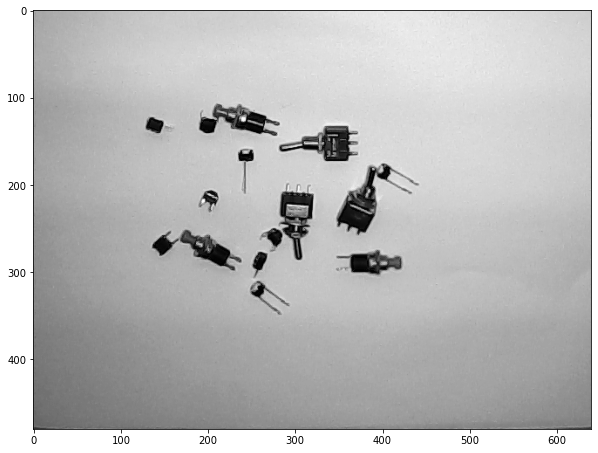

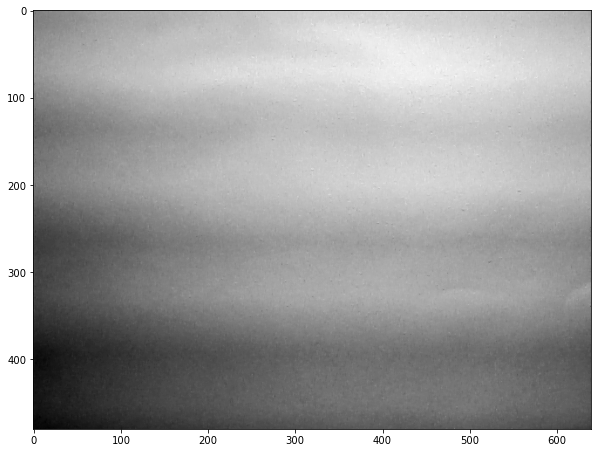

In [145]:
# import cv2
from matplotlib import pyplot as plt

src = cv2.imread("Imagenes/Completo/Escenarios/9.jpeg")
bg = cv2.imread("Imagenes/Completo/Escenarios/background.jpeg")

bg_gray = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
bg_color = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB )

# Convert image to gray and blur it
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB )



plt.figure(figsize=[10,10])
plt.imshow(src_gray,cmap=plt.cm.gray)
plt.figure(figsize=[10,10])
plt.imshow(bg_gray,cmap=plt.cm.gray)

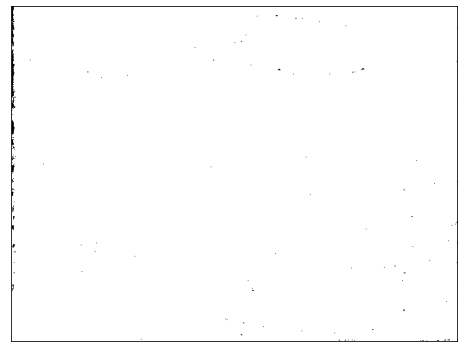

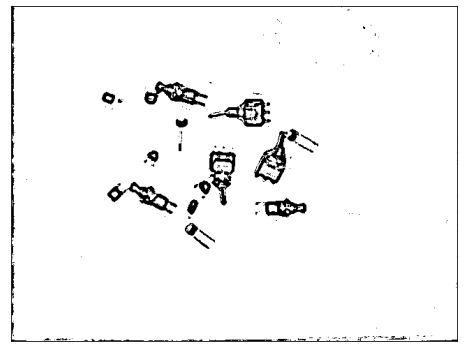

In [146]:
def gaussian(img):
    img = cv2.medianBlur(img,7)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    return th2
def plotimg(img):
    plt.figure(figsize=[8,8])
    plt.imshow(img, cmap = 'gray')
    
    plt.xticks([]),plt.yticks([])
    plt.show()

bg_filter = gaussian(bg_gray)
plotimg(bg_filter)
src_filter = gaussian(src_gray)
plotimg(src_filter)

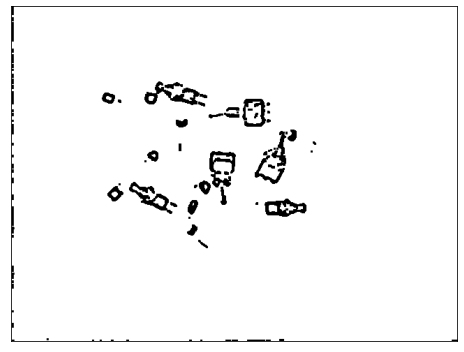

In [147]:
#Closing
kernel = np.ones((3,3),np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

closing = cv2.morphologyEx(src_filter, cv2.MORPH_CLOSE, kernel, iterations = 1)
plotimg(closing)



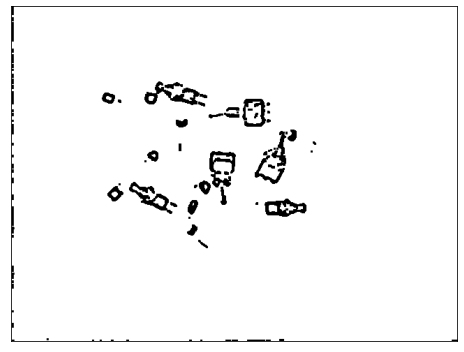

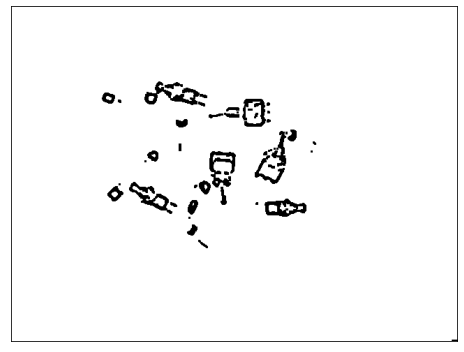

In [148]:
#Binary Treshold 
ret,thresh1 = cv2.threshold(closing,190,255,cv2.THRESH_BINARY)
plotimg(thresh1)
for i in range(len(thresh1)):
    for j in range(5):
        thresh1[i,j] = 255
for i in range(-1,-9,-1):
    for j in range(len(thresh1)):
        thresh1[i,j] = 255
        
plotimg(thresh1)
    


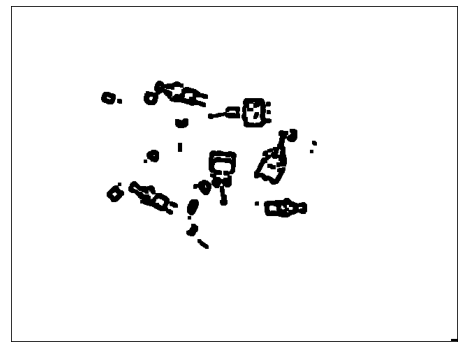

In [149]:
#erode

element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh1,kernel,iterations = 1)
plotimg(erosion)

([<matplotlib.lines.Line2D at 0x254071cc2b0>], Text(0.5, 1.0, 'Histograma'))

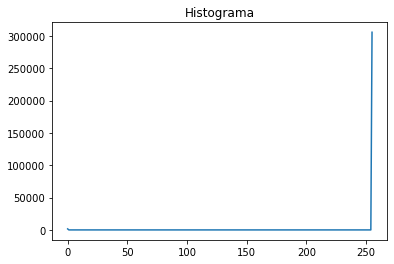

In [173]:
#Histograma Imagen
hist = cv2.calcHist([thresh1],[0],None,[256],[0,256])
plt.plot(hist), plt.title("Histograma")

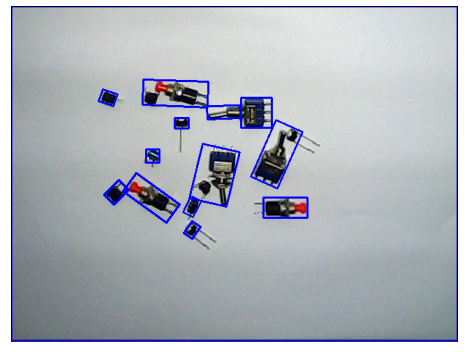

In [150]:
img_copy = thresh1.copy()

contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

outer_contours = []
src_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB )

for i in range(len(hierarchy[0])):
    if hierarchy[0,i,3] < 1:
        outer_contours.append(contours[i])
    else:
        continue
num_contours = 0

for i in range(len(outer_contours)):
    
    #x, y, w, h = cv2.boundingRect(outer_contours[i])
    rect = cv2.minAreaRect(outer_contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    dx1 = box[0,1]-box[3,1]
    dy1 = box[0,0]-box[3,0]
    dx2 = box[0,1]-box[1,1]
    dy2 = box[0,0]-box[1,0]
    w   = (dx1**2+dy1**2)**(1/2)
    h   = (dx2**2+dy2**2)**(1/2)

    if (w*h >= src_color.shape[0]*src_color.shape[1]) or w*h < 250:
        continue
    else:
        #cv2.rectangle(src_color, (x,y), (x+w, y+h), (255,0,0),2)
        cv2.drawContours(src_color,[box],0,(0,0,255),2)
        num_contours += 1



        
plotimg(src_color)

In [118]:
h

25.0

In [119]:
w

26.0

In [28]:
g

81

In [48]:
len(contours)

81

In [47]:
len(outer_contours)

57

In [50]:
num_contours

22